In [2]:
import os
import pandas as pd
import cv2
import urllib
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans
from colormath.color_objects import sRGBColor, LabColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000
from sklearn.cluster import KMeans
import timeit
import math 
import colorsys
import random

In [5]:
color_genre = pd.read_csv("dominant_color_genre.csv")
color_genre

,series_title,a,b,c,d,e,f,g,h,i,...,b3,R1,G1,B1,R2,G2,B2,R3,G3,B3
0,The Shawshank Redemption,0,0,1,0,0,0,0,0,0,...,20.834628,0.091928,0.058904,0.043448,0.890344,0.783210,0.609034,0.473361,0.297326,0.214355
1,The Godfather,0,0,1,0,0,1,0,0,0,...,20.584507,0.045104,0.021720,0.013680,0.823803,0.741042,0.612567,0.462276,0.351464,0.243661
2,The Dark Knight,0,1,1,0,0,1,0,0,0,...,-9.657371,0.239464,0.314630,0.360692,0.559219,0.625034,0.637038,0.072753,0.102553,0.150754
3,The Godfather: Part II,0,0,1,0,0,1,0,0,0,...,12.454751,0.017849,0.009697,0.008266,0.750718,0.691938,0.508538,0.316562,0.268135,0.200953
4,12 Angry Men,0,0,1,0,0,1,0,0,0,...,80.395795,0.894756,0.914650,0.829364,0.227966,0.231053,0.227965,0.906260,0.843656,0.117943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1,0,1,0,0,0,0,0,0,...,21.366780,0.974540,0.964650,0.935593,0.421693,0.202261,0.209776,0.798869,0.708908,0.569400
996,Giant,0,0,1,1,0,0,0,0,0,...,1.787980,0.771645,0.550857,0.330448,0.450661,0.164327,0.098770,0.954475,0.943782,0.931980
997,From Here to Eternity,1,0,1,1,0,0,0,0,0,...,28.968406,0.928651,0.936823,0.852482,0.363192,0.260817,0.154891,0.731397,0.622448,0.434989
998,Lifeboat,0,0,1,1,0,0,0,0,0,...,3.967415,0.895265,0.909935,0.806128,0.552792,0.535132,0.460182,0.189981,0.181055,0.159330


In [9]:
a = list(color_genre.iloc[:,1])*3
b = list(color_genre.iloc[:,2])*3
c = list(color_genre.iloc[:,3])*3
d = list(color_genre.iloc[:,4])*3
e = list(color_genre.iloc[:,5])*3
f = list(color_genre.iloc[:,6])*3
g = list(color_genre.iloc[:,7])*3
h = list(color_genre.iloc[:,8])*3
i = list(color_genre.iloc[:,9])*3

In [635]:
os.chdir("/Users/liuchenli/Desktop/NCCU/2022-workshop/IMDB-project")
dim_df = pd.read_csv("dim_df.csv")
dim_df.head()

,series_title,poster_link,link_available,width,height,color,description
0,The Shawshank Redemption,https://m.media-amazon.com/images/M/MV5BMDFkYT...,1,67.0,98.0,2.0,NaN
1,The Godfather,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1,67.0,98.0,2.0,NaN
2,The Dark Knight,https://m.media-amazon.com/images/M/MV5BMTMxNT...,1,67.0,98.0,2.0,NaN
3,The Godfather: Part II,https://m.media-amazon.com/images/M/MV5BMWMwMG...,1,67.0,98.0,2.0,NaN
4,12 Angry Men,https://m.media-amazon.com/images/M/MV5BMWU4N2...,1,67.0,98.0,2.0,NaN


# 讀取與下載圖檔

In [636]:
# 所有可用的海報連結 list
links = list(dim_df.loc[dim_df["link_available"]==1, "poster_link"])
len(links)

969

image shape: (98, 67, 3)


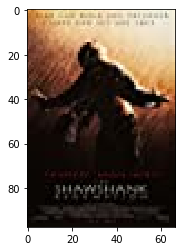

[[[237 168  93]
  [228 159  84]
  [193 125  50]
  ...
  [241 238 219]
  [247 242 222]
  [251 246 226]]

 [[215 145  73]
  [207 138  63]
  [199 131  58]
  ...
  [240 237 218]
  [246 241 221]
  [251 246 226]]

 [[193 123  53]
  [188 118  46]
  [202 134  63]
  ...
  [239 236 217]
  [245 240 220]
  [250 245 225]]

 ...

 [[  5   1   0]
  [ 12   8   5]
  [ 18  14  11]
  ...
  [ 10   6   3]
  [ 10   6   3]
  [ 10   6   3]]

 [[ 11   8   3]
  [ 11   8   3]
  [ 11   8   3]
  ...
  [ 11   7   4]
  [ 11   7   4]
  [ 11   7   4]]

 [[ 11   8   3]
  [ 11   8   3]
  [ 11   8   3]
  ...
  [ 11   7   4]
  [ 11   7   4]
  [ 11   7   4]]]


In [637]:
# 讀取連結中的海報
req = urllib.request.urlopen(links[0])
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)

# converting BGR color to RGB color format
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
# displaying image using plt.imshow() method
print(f"image shape: {RGB_img.shape}")
plt.imshow(RGB_img)
plt.show()
print(RGB_img)

(0, 0, 0) represents black and (255, 255, 255) represents white

In [638]:
# 儲存海報圖檔
cv2.imwrite("test.jpg", RGB_img)

True

image shape: (98, 67, 3)


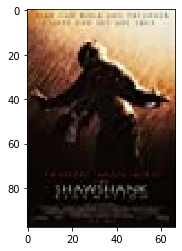

In [640]:
# 讀取海報圖檔
w_img = cv2.imread("test.jpg")
print(f"image shape: {RGB_img.shape}")
plt.imshow(w_img)
plt.show()

In [275]:
# index of "link_available"==1
link_index = dim_df[dim_df["link_available"]==1].index.tolist()
link_index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 19

In [276]:
# list of poster#.jpg
# link_index_str = link_index+1
link_index_str = ["poster"+str(x+1)+".jpg" for x in link_index]
link_index_str

['poster1.jpg',
 'poster2.jpg',
 'poster3.jpg',
 'poster4.jpg',
 'poster5.jpg',
 'poster6.jpg',
 'poster7.jpg',
 'poster8.jpg',
 'poster9.jpg',
 'poster10.jpg',
 'poster11.jpg',
 'poster12.jpg',
 'poster13.jpg',
 'poster14.jpg',
 'poster15.jpg',
 'poster16.jpg',
 'poster17.jpg',
 'poster18.jpg',
 'poster19.jpg',
 'poster20.jpg',
 'poster21.jpg',
 'poster22.jpg',
 'poster23.jpg',
 'poster24.jpg',
 'poster25.jpg',
 'poster26.jpg',
 'poster27.jpg',
 'poster28.jpg',
 'poster29.jpg',
 'poster31.jpg',
 'poster32.jpg',
 'poster33.jpg',
 'poster34.jpg',
 'poster35.jpg',
 'poster36.jpg',
 'poster37.jpg',
 'poster38.jpg',
 'poster39.jpg',
 'poster40.jpg',
 'poster41.jpg',
 'poster42.jpg',
 'poster43.jpg',
 'poster44.jpg',
 'poster45.jpg',
 'poster46.jpg',
 'poster47.jpg',
 'poster48.jpg',
 'poster50.jpg',
 'poster51.jpg',
 'poster52.jpg',
 'poster53.jpg',
 'poster54.jpg',
 'poster55.jpg',
 'poster56.jpg',
 'poster57.jpg',
 'poster58.jpg',
 'poster59.jpg',
 'poster60.jpg',
 'poster61.jpg',
 'post

In [291]:
# find list index
print(link_index.index(59))
print(link_index_str[57])
print(links[57])

57
poster60.jpg
https://m.media-amazon.com/images/M/MV5BMTc5MDE2ODcwNV5BMl5BanBnXkFtZTgwMzI2NzQ2NzM@._V1_UX67_CR0,0,67,98_AL_.jpg


In [644]:
# change path
os.chdir("poster")
os.getcwd()

'/Users/liuchenli/Desktop/NCCU/2022-workshop/IMDB-project/poster'

In [272]:
# download all poster
for i in range(len(links)):
    req = urllib.request.urlopen(links[i])
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    poster = cv2.imdecode(arr, -1)
    cv2.imwrite(link_index_str[i], poster)

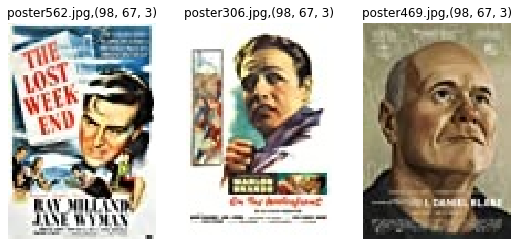

In [310]:
# random sample 3 posters
import random
random.seed(2022)
demo = sample(link_index_str,3)

plt.figure(figsize=(9, 27))
for i in range(3):
    plt.subplot(1, 3, i+1)
    BGR_img = cv2.imread(demo[i])
    RGB_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_img)
    plt.axis("off")
    plt.title(f"{demo[i]},{RGB_img.shape}")
plt.show()

# 圖檔色彩資料

In [642]:
# 海報每個像素RGB中R的數值
RGB_img[:,:,0] # 0: R, 1: G, 2: B 

array([[237, 228, 193, ..., 241, 247, 251],
       [215, 207, 199, ..., 240, 246, 251],
       [193, 188, 202, ..., 239, 245, 250],
       ...,
       [  5,  12,  18, ...,  10,  10,  10],
       [ 11,  11,  11, ...,  11,  11,  11],
       [ 11,  11,  11, ...,  11,  11,  11]], dtype=uint8)

In [641]:
# or直接用split
R, G, B = cv2.split(RGB_img)
R

array([[237, 228, 193, ..., 241, 247, 251],
       [215, 207, 199, ..., 240, 246, 251],
       [193, 188, 202, ..., 239, 245, 250],
       ...,
       [  5,  12,  18, ...,  10,  10,  10],
       [ 11,  11,  11, ...,  11,  11,  11],
       [ 11,  11,  11, ...,  11,  11,  11]], dtype=uint8)

image shape: (98, 67, 3)


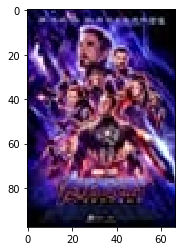

[[[ 5  6 36]
  [ 9  9 43]
  [15 12 55]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0 27]
  [ 2  2 36]
  [11  9 49]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 3  7 36]
  [ 0  0 28]
  [ 1  0 36]
  ...
  [ 0  0  2]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 1  1  3]
  [ 1  1  3]
  [ 0  0  2]
  ...
  [ 3  3 37]
  [ 0  0 36]
  [ 0  0 35]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 0  0 30]
  [ 0  0 34]
  [ 0  0 34]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 0  0 30]
  [ 0  1 32]
  [ 0  1 32]]]


In [645]:
# 轉換color space: BRG -> RGB
BGR_img = cv2.imread("poster60.jpg")
RGB_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2RGB)

print(f"image shape: {RGB_img.shape}")
plt.imshow(RGB_img)
plt.show()
print(RGB_img)

image shape: (98, 67, 3)


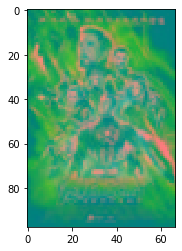

[[[  7 136 110]
  [ 10 138 107]
  [ 15 145 101]
  ...
  [  0 128 128]
  [  0 128 128]
  [  0 128 128]]

 [[  2 132 115]
  [  5 136 109]
  [ 11 141 103]
  ...
  [  0 128 128]
  [  0 128 128]
  [  0 128 128]]

 [[  7 134 110]
  [  2 134 114]
  [  3 136 108]
  ...
  [  0 128 127]
  [  0 128 128]
  [  0 128 128]]

 ...

 [[  1 128 127]
  [  1 128 127]
  [  0 128 127]
  ...
  [  6 136 109]
  [  3 136 108]
  [  2 136 108]]

 [[  1 128 128]
  [  1 128 128]
  [  1 128 128]
  ...
  [  2 134 112]
  [  2 136 109]
  [  2 136 109]]

 [[  1 128 128]
  [  1 128 128]
  [  1 128 128]
  ...
  [  2 134 112]
  [  3 134 112]
  [  3 134 112]]]


In [646]:
# 轉換color space: RGB -> Lab 
Lab_img = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2Lab)

print(f"image shape: {Lab_img.shape}")
plt.imshow(Lab_img) # imshow can't display Lab!!! Lab數值，但只能以RGB繪製
plt.show()
print(Lab_img)

image shape: (98, 67, 3)


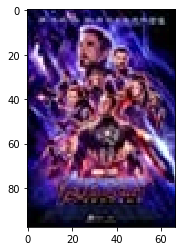

[[[ 7  6 36]
  [10  9 43]
  [16 12 55]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  1 26]
  [ 4  3 36]
  [10  9 49]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 2  7 36]
  [ 2  0 27]
  [ 0  0 36]
  ...
  [ 0  0  2]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  2  4]
  [ 0  2  4]
  [ 0  0  2]
  ...
  [ 5  5 37]
  [ 0  0 36]
  [ 0  0 35]]

 [[ 2  2  2]
  [ 2  2  2]
  [ 2  2  2]
  ...
  [ 0  0 30]
  [ 1  0 34]
  [ 1  0 34]]

 [[ 2  2  2]
  [ 2  2  2]
  [ 2  2  2]
  ...
  [ 0  0 30]
  [ 1  1 31]
  [ 1  1 31]]]


In [647]:
# 轉換color space: Lab -> RGB
Lab2RGB_img = cv2.cvtColor(Lab_img, cv2.COLOR_Lab2RGB)

print(f"image shape: {Lab2RGB_img.shape}")
plt.imshow(Lab2RGB_img) # 變回來的RGB數值有些許差異
plt.show()
print(Lab2RGB_img)

# 圖檔色彩資料dataframe與分群

In [754]:
# 儲存每個pixel的Lab值
BGR_img = cv2.imread("poster60.jpg")
RGB_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2RGB)
RGB_gblur = cv2.GaussianBlur(RGB_img,(15,15),0)
Lab_img = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2Lab)
Lab_gblur = cv2.GaussianBlur(Lab_img,(15,15),0)

L, a, b = cv2.split(Lab_img)
L_g, a_g, b_g = cv2.split(Lab_gblur)

poster_df = pd.DataFrame({'L' : list(np.reshape(L, L.shape[0]*L.shape[1])),
                          'a' : list(np.reshape(a, a.shape[0]*a.shape[1])),
                          'b' : list(np.reshape(b, L.shape[0]*b.shape[1]))})
poster_df["L_g"] = list(np.reshape(L_g, L_g.shape[0]*L_g.shape[1]))
poster_df["a_g"] = list(np.reshape(a_g, a_g.shape[0]*a_g.shape[1]))
poster_df["b_g"] = list(np.reshape(b_g, L_g.shape[0]*b_g.shape[1]))

poster_df

,L,a,b,L_g,a_g,b_g
0,7,136,110,12,140,104
1,10,138,107,13,141,104
2,15,145,101,15,142,103
3,24,146,99,18,144,101
4,14,147,99,23,146,98
...,...,...,...,...,...,...
6561,1,132,120,5,137,109
6562,2,130,119,5,137,108
6563,2,134,112,5,137,108
6564,3,134,112,5,138,107


In [674]:
# 準備做k-mean的data
X = poster_df.iloc[:,0:3].values
Y = poster_df.iloc[:,3:6].values
print(X)
print()
print(Y)

[[  7 136 110]
 [ 10 138 107]
 [ 15 145 101]
 ...
 [  2 134 112]
 [  3 134 112]
 [  3 134 112]]

[[ 12 140 104]
 [ 13 141 104]
 [ 15 142 103]
 ...
 [  5 137 108]
 [  5 138 107]
 [  5 138 107]]


In [675]:
# 用k-mean將海報Lab色彩分三群（找出三個主要顏色）
kmeans = KMeans(n_clusters = 3, init = 'k-means++',  random_state=2022)
kmeans.fit(X)
kmeans.fit(Y)
poster_df["cluster"] = kmeans.predict(X)
poster_df["cluster_g"] = kmeans.predict(Y)

In [676]:
poster_df

,L,a,b,L_g,a_g,b_g,cluster,cluster_g
0,7,136,110,12,140,104,0,0
1,10,138,107,13,141,104,0,0
2,15,145,101,15,142,103,0,0
3,24,146,99,18,144,101,0,0
4,14,147,99,23,146,98,0,0
...,...,...,...,...,...,...,...,...
6561,1,132,120,5,137,109,0,0
6562,2,130,119,5,137,108,0,0
6563,2,134,112,5,137,108,0,0
6564,3,134,112,5,138,107,0,0


In [699]:
color_df = pd.DataFrame(columns = ["series_title",
                                   "L1","a1","b1","L2","a2","b2","L3","a3","b3",
                                   "L_g1","a_g1","b_g1","L_g2","a_g2","b_g2","L_g3","a_g3","b_g3"])
color_df["series_title"] = dim_df["series_title"]
color_df # 每張電影海報的三種主要顏色

,series_title,L1,a1,b1,L2,a2,b2,L3,a3,b3,L_g1,a_g1,b_g1,L_g2,a_g2,b_g2,L_g3,a_g3,b_g3
0,The Shawshank Redemption,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The Godfather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Dark Knight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The Godfather: Part II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12 Angry Men,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,Giant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,From Here to Eternity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,Lifeboat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [689]:
c0 = poster_df[poster_df["cluster"]==0]
c0[["L","a","b"]].mean()

L     15.052738
a    143.869777
b    109.880325
dtype: float64

In [711]:
np.array(poster_df[poster_df["cluster"]==0][["L","a","b"]].mean())

array([ 15.05273834, 143.86977688, 109.88032454])

In [739]:
color_df.loc[0][1:4] = np.array(poster_df[poster_df["cluster"]==0][["L","a","b"]].mean())
color_df.loc[0][4:7] = np.array(poster_df[poster_df["cluster"]==1][["L","a","b"]].mean())
color_df.loc[0][7:10] = np.array(poster_df[poster_df["cluster"]==2][["L","a","b"]].mean())

color_df.loc[0][10:13] = np.array(poster_df[poster_df["cluster_g"]==0][["L_g","a_g","b_g"]].mean())
color_df.loc[0][13:16] = np.array(poster_df[poster_df["cluster_g"]==1][["L_g","a_g","b_g"]].mean())
color_df.loc[0][16:19] = np.array(poster_df[poster_df["cluster_g"]==2][["L_g","a_g","b_g"]].mean())

color_df # Lab value in openCV (0<L,a,b<255), not 0<L<100 -127<a<127 -127<b<127

,series_title,L1,a1,b1,L2,a2,b2,L3,a3,b3,L_g1,a_g1,b_g1,L_g2,a_g2,b_g2,L_g3,a_g3,b_g3
0,The Shawshank Redemption,15.0527,143.87,109.88,125.608,156.302,111.966,53.7255,163.741,87.1347,20.4319,140.986,107.987,98.1559,156.863,112.834,56.3751,159.494,90.7688
1,The Godfather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Dark Knight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The Godfather: Part II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12 Angry Men,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,Giant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,From Here to Eternity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,Lifeboat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [742]:
color_df_Lab = color_df.copy()
color_df_Lab.iloc[:,[1,4,7,10,13,16]] = color_df_Lab.iloc[:,[1,4,7,10,13,16]].apply(lambda x: x*100/255)
color_df_Lab.iloc[:,[2,5,8,11,14,17]] = color_df_Lab.iloc[:,[2,5,8,11,14,17]].apply(lambda x: x-128)
color_df_Lab.iloc[:,[3,6,9,12,15,18]] = color_df_Lab.iloc[:,[3,6,9,12,15,18]].apply(lambda x: x-128)

color_df_Lab # Lab value ( 0<L<100, -127<a<127, -127<b<127)

,series_title,L1,a1,b1,L2,a2,b2,L3,a3,b3,L_g1,a_g1,b_g1,L_g2,a_g2,b_g2,L_g3,a_g3,b_g3
0,The Shawshank Redemption,5.90303,15.8698,-18.1197,49.2579,28.3019,-16.0342,21.0688,35.7412,-40.8653,8.01252,12.9862,-20.0126,38.4925,28.8627,-15.1665,22.1079,31.494,-37.2312
1,The Godfather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Dark Knight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The Godfather: Part II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12 Angry Men,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,Giant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,From Here to Eternity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,Lifeboat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [744]:
color_df_sRGB = color_df_Lab.copy()
#for i in range(1000):
for j in (1,4,7,10,13,16):
    temp = color_df_sRGB.iloc[0,j:j+3]
    color_df_sRGB.iloc[0,j:j+3] = sRGBColor.get_value_tuple(convert_color(LabColor(temp[0],temp[1],temp[2]), sRGBColor))
color_df_sRGB # sRGB value (0 < R,G,B < 1)

,series_title,L1,a1,b1,L2,a2,b2,L3,a3,b3,L_g1,a_g1,b_g1,L_g2,a_g2,b_g2,L_g3,a_g3,b_g3
0,The Shawshank Redemption,0.117873,0.0387395,0.170102,0.602893,0.387777,0.569007,0.292783,0.100279,0.440935,0.112931,0.068955,0.197777,0.495773,0.281927,0.455028,0.290899,0.128693,0.429007
1,The Godfather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Dark Knight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The Godfather: Part II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12 Angry Men,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,Giant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,From Here to Eternity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,Lifeboat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [759]:
# 原始海報圖檔的三個主要顏色array
color_board = [[tuple(color_df_sRGB.iloc[0,1:4]),
                tuple(color_df_sRGB.iloc[0,4:7]),
                tuple(color_df_sRGB.iloc[0,7:10])]]
color_board

[[(0.11787253502685047, 0.03873953782986192, 0.1701020966044659),
  (0.6028928749327519, 0.38777746377028083, 0.5690067453279203),
  (0.2927825372578744, 0.10027881815686751, 0.44093524320415173)]]

In [762]:
# blur海報圖檔的三個主要顏色array
color_board_g = [[tuple(color_df_sRGB.iloc[0,10:13]),
                tuple(color_df_sRGB.iloc[0,13:16]),
                tuple(color_df_sRGB.iloc[0,16:19])]]
color_board_g

[[(0.11293137313330304, 0.0689550137136275, 0.19777691422120353),
  (0.4957728154722985, 0.28192684478711927, 0.4550280585707526),
  (0.2908992775099707, 0.12869268084709198, 0.42900729316718816)]]

In [839]:
# change path
os.chdir("dominant_color")
os.getcwd()

'/Users/liuchenli/Desktop/NCCU/2022-workshop/IMDB-project/dominant_color'

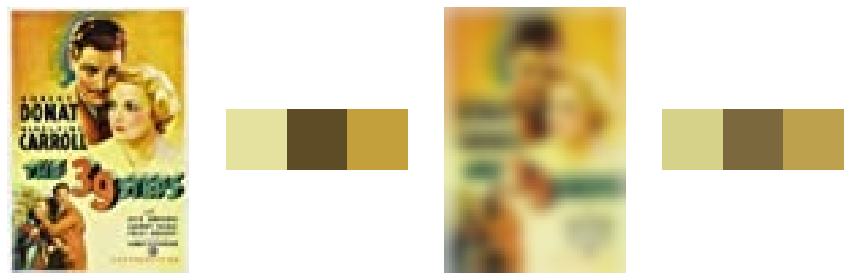

In [838]:
# 海報與主要顏色比對
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
plt.imshow(RGB_img)
plt.axis("off")
plt.subplot(1, 4, 2)
plt.imshow(color_board)
plt.axis("off")
plt.subplot(1, 4, 3)
plt.imshow(RGB_gblur)
plt.axis("off")
plt.subplot(1, 4, 4)
plt.imshow(color_board_g)
plt.axis("off")
plt.savefig("poster"+str(i)+"_color.jpg",dpi=72) # save the figure
plt.show()

# 利用迴圈跑完所有海報圖檔的資料 (with blur)

In [ ]:
jpg_list = ["poster"+str(x+1)+".jpg" for x in range(1000)]

# 每張電影海報的三種主要顏色dataframe
# Lab in opencv
color_df = pd.DataFrame(columns = ["series_title","L1","a1","b1","L2","a2","b2","L3","a3","b3",
                                   "L_g1","a_g1","b_g1","L_g2","a_g2","b_g2","L_g3","a_g3","b_g3"])
color_df["series_title"] = dim_df["series_title"]

# Lab
color_df_Lab = pd.DataFrame(columns = ["series_title","L1","a1","b1","L2","a2","b2","L3","a3","b3",
                                       "L_g1","a_g1","b_g1","L_g2","a_g2","b_g2","L_g3","a_g3","b_g3"])
color_df_Lab["series_title"] = dim_df["series_title"]

# sRGB
color_df_sRGB = pd.DataFrame(columns = ["series_title","L1","a1","b1","L2","a2","b2","L3","a3","b3",
                                        "L_g1","a_g1","b_g1","L_g2","a_g2","b_g2","L_g3","a_g3","b_g3"])
color_df_sRGB["series_title"] = dim_df["series_title"]


# start
start = timeit.default_timer()

for i in range(1000):
    
    if dim_df["link_available"][i]==0:
        continue
    
    # change path
    os.chdir("../poster")
    
    # 儲存每個pixel的Lab值
    BGR_img = cv2.imread(jpg_list[i])
    RGB_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2RGB)
    RGB_gblur = cv2.GaussianBlur(RGB_img,(15,15),0)
    Lab_img = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2Lab)
    Lab_gblur = cv2.GaussianBlur(Lab_img,(15,15),0)

    L, a, b = cv2.split(Lab_img)
    L_g, a_g, b_g = cv2.split(Lab_gblur)

    poster_df = pd.DataFrame({'L' : list(np.reshape(L, L.shape[0]*L.shape[1])),
                              'a' : list(np.reshape(a, a.shape[0]*a.shape[1])),
                              'b' : list(np.reshape(b, L.shape[0]*b.shape[1]))})
    poster_df["L_g"] = list(np.reshape(L_g, L_g.shape[0]*L_g.shape[1]))
    poster_df["a_g"] = list(np.reshape(a_g, a_g.shape[0]*a_g.shape[1]))
    poster_df["b_g"] = list(np.reshape(b_g, L_g.shape[0]*b_g.shape[1]))
    
    # 準備做k-mean的data
    X = poster_df.iloc[:,0:3].values
    Y = poster_df.iloc[:,3:6].values
    
    # 用k-mean將海報Lab色彩分三群（找出三個主要顏色）
    kmeans = KMeans(n_clusters = 3, init = 'k-means++',  random_state=2022)
    kmeans.fit(X)
    kmeans.fit(Y)
    poster_df["cluster"] = kmeans.predict(X)
    poster_df["cluster_g"] = kmeans.predict(Y)
    
    # 每張電影海報的三種主要顏色
    # Lab value in openCV (0 < L,a,b < 255), not 0<L<100 -127<a<127 -127<b<127
    color_df.loc[i][1:4] = np.array(poster_df[poster_df["cluster"]==0][["L","a","b"]].mean())
    color_df.loc[i][4:7] = np.array(poster_df[poster_df["cluster"]==1][["L","a","b"]].mean())
    color_df.loc[i][7:10] = np.array(poster_df[poster_df["cluster"]==2][["L","a","b"]].mean())

    color_df.loc[i][10:13] = np.array(poster_df[poster_df["cluster_g"]==0][["L_g","a_g","b_g"]].mean())
    color_df.loc[i][13:16] = np.array(poster_df[poster_df["cluster_g"]==1][["L_g","a_g","b_g"]].mean())
    color_df.loc[i][16:19] = np.array(poster_df[poster_df["cluster_g"]==2][["L_g","a_g","b_g"]].mean())
    
    
    # Lab value ( 0<L<100, -127<a<127, -127<b<127)
    color_df_Lab.iloc[i,[1,4,7,10,13,16]] = color_df.iloc[i,[1,4,7,10,13,16]].apply(lambda x: x*100/255)
    color_df_Lab.iloc[i,[2,5,8,11,14,17]] = color_df.iloc[i,[2,5,8,11,14,17]].apply(lambda x: x-128)
    color_df_Lab.iloc[i,[3,6,9,12,15,18]] = color_df.iloc[i,[3,6,9,12,15,18]].apply(lambda x: x-128)


    # sRGB value (0 < R,G,B < 1)
    for j in (1,4,7,10,13,16):
        temp = color_df_Lab.iloc[i,j:j+3]
        color_df_sRGB.iloc[i,j:j+3] = sRGBColor.get_value_tuple(convert_color(LabColor(temp[0],temp[1],temp[2]), sRGBColor)) 

    # 原始海報圖檔的三個主要顏色array
    color_board = [[tuple(color_df_sRGB.iloc[i,1:4]),
                    tuple(color_df_sRGB.iloc[i,4:7]),
                    tuple(color_df_sRGB.iloc[i,7:10])]]

    # blur海報圖檔的三個主要顏色array
    color_board_g = [[tuple(color_df_sRGB.iloc[i,10:13]),
                      tuple(color_df_sRGB.iloc[i,13:16]),
                      tuple(color_df_sRGB.iloc[i,16:19])]]

    # change path
    os.chdir("../dominant_color")

    # 海報與主要顏色比對
    plt.figure(figsize=(15,5))
    plt.subplot(1, 4, 1)
    plt.imshow(RGB_img)
    plt.axis("off")
    plt.subplot(1, 4, 2)
    plt.imshow(color_board)
    plt.axis("off")
    plt.subplot(1, 4, 3)
    plt.imshow(RGB_gblur)
    plt.axis("off")
    plt.subplot(1, 4, 4)
    plt.imshow(color_board_g)
    plt.axis("off")
    plt.savefig("poster"+str(i+1)+"_color.jpg",dpi=72) # save the figure
    plt.show()

# stop
stop = timeit.default_timer()

print('Time: ', stop - start)

# 匯出檔案

In [840]:
os.chdir("../")
os.getcwd()

'/Users/liuchenli/Desktop/NCCU/2022-workshop/IMDB-project'

In [834]:
color_df.to_csv("dominant_color_Lab_opencv.csv")
color_df_Lab.to_csv("dominant_color_Lab.csv")
color_df_sRGB.to_csv("dominant_color_sRGB.csv")

# 利用迴圈跑完所有海報圖檔的資料 (without blur)

In [1333]:
os.chdir("/Users/liuchenli/Desktop/NCCU/2022-workshop/IMDB-project")
poster_info = pd.read_csv("poster_info.csv")
poster_info.head()

,series_title,released_year,file_name,poster_link_original,link_available,description,poster_link,width,height,color
0,The Shawshank Redemption,1994,poster1.jpg,https://m.media-amazon.com/images/M/MV5BMDFkYT...,1,NaN,https://m.media-amazon.com/images/M/MV5BMDFkYT...,67,98,1
1,The Godfather,1972,poster2.jpg,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1,NaN,https://m.media-amazon.com/images/M/MV5BM2MyNj...,67,98,1
2,The Dark Knight,2008,poster3.jpg,https://m.media-amazon.com/images/M/MV5BMTMxNT...,1,NaN,https://m.media-amazon.com/images/M/MV5BMTMxNT...,67,98,1
3,The Godfather: Part II,1974,poster4.jpg,https://m.media-amazon.com/images/M/MV5BMWMwMG...,1,NaN,https://m.media-amazon.com/images/M/MV5BMWMwMG...,67,98,1
4,12 Angry Men,1957,poster5.jpg,https://m.media-amazon.com/images/M/MV5BMWU4N2...,1,NaN,https://m.media-amazon.com/images/M/MV5BMWU4N2...,67,98,1


In [ ]:
# 每張電影海報的三種主要顏色dataframe

dominant_color = pd.DataFrame(columns = ["series_title","cv_L1","cv_a1","cv_b1","cv_L2","cv_a2","cv_b2","cv_L3","cv_a3","cv_b3", #Lab in opencv
                                         "L1","a1","b1","L2","a2","b2","L3","a3","b3", #standard Lab
                                         "R1","G1","B1","R2","G2","B2","R3","G3","B3"]) #RGB
dominant_color["series_title"] = poster_info["series_title"]

# start
start = timeit.default_timer()

for i in range(1000):
    
    # change path
    os.chdir("../poster")
    
    # 儲存每個pixel的Lab值
    BGR_img = cv2.imread(poster_info.iloc[i,2])
    RGB_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2RGB)
    Lab_img = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2Lab)

    L, a, b = cv2.split(Lab_img)

    poster_df = pd.DataFrame({'L' : list(np.reshape(L, L.shape[0]*L.shape[1])),
                              'a' : list(np.reshape(a, a.shape[0]*a.shape[1])),
                              'b' : list(np.reshape(b, L.shape[0]*b.shape[1]))})
    
    # 準備做k-mean的data
    X = poster_df.iloc[:,0:3].values
    
    # 用k-mean將海報Lab色彩分三群（找出三個主要顏色）
    kmeans = KMeans(n_clusters = 3, init = 'k-means++',  random_state=2022)
    kmeans.fit(X)
    poster_df["cluster"] = kmeans.predict(X)
    
    # 每張電影海報的三種主要顏色
    # Lab value in openCV (0 < L,a,b < 255), not 0<L<100 -127<a<127 -127<b<127
    dominant_color.loc[i][1:4] = np.array(poster_df[poster_df["cluster"]==0][["L","a","b"]].mean()) #color 1
    dominant_color.loc[i][4:7] = np.array(poster_df[poster_df["cluster"]==1][["L","a","b"]].mean()) #color 2
    dominant_color.loc[i][7:10] = np.array(poster_df[poster_df["cluster"]==2][["L","a","b"]].mean()) #color 3

    # Lab value ( 0<L<100, -127<a<127, -127<b<127)
    dominant_color.loc[i][[10,13,16]] = dominant_color.iloc[i,[1,4,7]].apply(lambda x: x*100/255) #calculate standard L
    dominant_color.loc[i][[11,14,17]] = dominant_color.iloc[i,[2,5,8]].apply(lambda x: x-128) #calculate standard a
    dominant_color.loc[i][[12,15,18]] = dominant_color.iloc[i,[3,6,9]].apply(lambda x: x-128) #calculate standard b


    # sRGB value (0 < R,G,B < 1)
    for j in (10,13,16): #color 1,2,3的Lab value起始值，轉變成sRGB value
        temp = dominant_color.iloc[i,j:j+3]
        dominant_color.iloc[i,j+9:j+9+3] = sRGBColor.get_value_tuple(convert_color(LabColor(temp[0],temp[1],temp[2]), sRGBColor)) 

    # 原始海報圖檔的三個主要顏色array
    color_board = [[tuple(dominant_color.iloc[i,19:22]),
                    tuple(dominant_color.iloc[i,22:25]),
                    tuple(dominant_color.iloc[i,25:28])]]

    # change path
    os.chdir("../dominant_color")

    # 海報與主要顏色比對
    plt.figure(figsize=(9,5))
    plt.subplot(1, 2, 1)
    plt.imshow(RGB_img)
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(color_board)
    plt.axis("off")
    plt.savefig("poster"+str(i+1)+"_color.jpg",dpi=72) # save the figure
    plt.show()

# stop
stop = timeit.default_timer()

print('Time: ', stop - start)

In [1316]:
dominant_color

,series_title,cv_L1,cv_a1,cv_b1,cv_L2,cv_a2,cv_b2,cv_L3,cv_a3,cv_b3,...,b3,R1,G1,B1,R2,G2,B2,R3,G3,B3
0,The Shawshank Redemption,12.89,131.122,131.061,209.196,133.212,154.013,94.7214,145.779,148.835,...,20.8346,0.0919282,0.0589036,0.0434482,0.890344,0.78321,0.609034,0.473361,0.297326,0.214355
1,The Godfather,4.72246,129.423,129.365,198.336,132.019,147.499,103.384,137.184,148.585,...,20.5845,0.0451038,0.0217196,0.0136802,0.823803,0.741042,0.612567,0.462276,0.351464,0.243661
2,The Dark Knight,83.7973,122.711,118.532,164.156,122.337,124.267,23.0847,127.549,118.343,...,-9.65737,0.239464,0.31463,0.360692,0.559219,0.625034,0.637038,0.0727533,0.102553,0.150754
3,The Godfather: Part II,2.03665,128.526,128.341,184.685,128.332,154.064,76.3371,131.29,140.455,...,12.4548,0.0178488,0.00969686,0.00826569,0.750718,0.691938,0.508538,0.316562,0.268135,0.200953
4,12 Angry Men,233.576,123.436,137.987,63.0713,127.517,128.362,217.594,121.082,208.396,...,80.3958,0.894756,0.91465,0.829364,0.227966,0.231053,0.227965,0.90626,0.843656,0.117943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,247.154,127.917,131.879,74.6759,153.57,138.926,191.038,132.532,149.367,...,21.3668,0.97454,0.96465,0.935593,0.421693,0.202261,0.209776,0.798869,0.708908,0.5694
996,Giant,161.247,145.611,166.591,71.8354,160.074,155.823,242.704,128.551,129.788,...,1.78798,0.771645,0.550857,0.330448,0.450661,0.164327,0.0987699,0.954475,0.943782,0.93198
997,From Here to Eternity,239.231,124.545,138.188,78.1671,137.053,148.961,171.006,133.681,156.968,...,28.9684,0.928651,0.936823,0.852482,0.363192,0.260817,0.154891,0.731397,0.622448,0.434989
998,Lifeboat,232.536,123.339,140.473,145.013,127.204,138.933,48.734,128.162,131.967,...,3.96741,0.895265,0.909935,0.806128,0.552792,0.535132,0.460182,0.189981,0.181055,0.15933


In [1338]:
dominant_color_info = pd.concat([poster_info,dominant_color.iloc[:,1:28]], axis=1)
dominant_color_info

,series_title,released_year,file_name,poster_link_original,link_available,description,poster_link,width,height,color,...,b3,R1,G1,B1,R2,G2,B2,R3,G3,B3
0,The Shawshank Redemption,1994,poster1.jpg,https://m.media-amazon.com/images/M/MV5BMDFkYT...,1,NaN,https://m.media-amazon.com/images/M/MV5BMDFkYT...,67,98,1,...,20.8346,0.0919282,0.0589036,0.0434482,0.890344,0.78321,0.609034,0.473361,0.297326,0.214355
1,The Godfather,1972,poster2.jpg,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1,NaN,https://m.media-amazon.com/images/M/MV5BM2MyNj...,67,98,1,...,20.5845,0.0451038,0.0217196,0.0136802,0.823803,0.741042,0.612567,0.462276,0.351464,0.243661
2,The Dark Knight,2008,poster3.jpg,https://m.media-amazon.com/images/M/MV5BMTMxNT...,1,NaN,https://m.media-amazon.com/images/M/MV5BMTMxNT...,67,98,1,...,-9.65737,0.239464,0.31463,0.360692,0.559219,0.625034,0.637038,0.0727533,0.102553,0.150754
3,The Godfather: Part II,1974,poster4.jpg,https://m.media-amazon.com/images/M/MV5BMWMwMG...,1,NaN,https://m.media-amazon.com/images/M/MV5BMWMwMG...,67,98,1,...,12.4548,0.0178488,0.00969686,0.00826569,0.750718,0.691938,0.508538,0.316562,0.268135,0.200953
4,12 Angry Men,1957,poster5.jpg,https://m.media-amazon.com/images/M/MV5BMWU4N2...,1,NaN,https://m.media-amazon.com/images/M/MV5BMWU4N2...,67,98,1,...,80.3958,0.894756,0.91465,0.829364,0.227966,0.231053,0.227965,0.90626,0.843656,0.117943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,poster996.jpg,https://m.media-amazon.com/images/M/MV5BNGEwMT...,1,NaN,https://m.media-amazon.com/images/M/MV5BNGEwMT...,67,98,1,...,21.3668,0.97454,0.96465,0.935593,0.421693,0.202261,0.209776,0.798869,0.708908,0.5694
996,Giant,1956,poster997.jpg,https://m.media-amazon.com/images/M/MV5BODk3Yj...,1,NaN,https://m.media-amazon.com/images/M/MV5BODk3Yj...,67,98,1,...,1.78798,0.771645,0.550857,0.330448,0.450661,0.164327,0.0987699,0.954475,0.943782,0.93198
997,From Here to Eternity,1953,poster998.jpg,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,1,NaN,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,67,98,1,...,28.9684,0.928651,0.936823,0.852482,0.363192,0.260817,0.154891,0.731397,0.622448,0.434989
998,Lifeboat,1944,poster999.jpg,https://m.media-amazon.com/images/M/MV5BZTBmMj...,1,NaN,https://m.media-amazon.com/images/M/MV5BZTBmMj...,67,98,1,...,3.96741,0.895265,0.909935,0.806128,0.552792,0.535132,0.460182,0.189981,0.181055,0.15933


In [28]:
os.chdir("dominant_color")
os.getcwd()

'/Users/liuchenli/Desktop/NCCU/2022-workshop/IMDB-project/dominant_color'

In [40]:
import random
random.seed(2022)
demo = random.sample(range(1000),6)
demo

[544, 295, 453, 558, 317, 599]

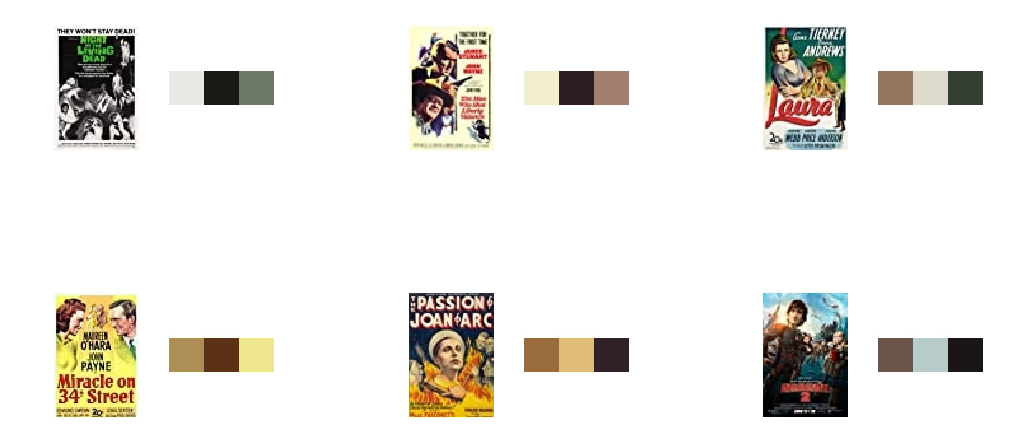

In [41]:
# random sample 6 posters
plt.figure(figsize=(18, 9))
for i in range(6):
    plt.subplot(2, 3, i+1)
    BGR_img = cv2.imread("poster"+str(demo[i]+1)+"_color.jpg")
    RGB_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_img)
    plt.axis("off")
plt.savefig("sample_6_poster.jpg",dpi=72) # save the figure
plt.show()

# 匯出檔案

In [96]:
os.chdir("IMDB-project")
os.getcwd()

'/Users/liuchenli/Desktop/NCCU/2022-workshop/IMDB-project'

In [1341]:
dominant_color_info.to_csv("dominant_color_info.csv")
dominant_color.to_csv("dominant_color.csv")

# 所有顏色的排序與呈現

In [58]:
# 讀取各海報三種主要顏色的openCVLab,Lab,sRGB資料
dominant_color_info = pd.read_csv("dominant_color_info.csv")
dominant_color_df = pd.read_csv("dominant_color.csv")
dominant_color_df.head()

,series_title,cv_L1,cv_a1,cv_b1,cv_L2,cv_a2,cv_b2,cv_L3,cv_a3,cv_b3,...,b3,R1,G1,B1,R2,G2,B2,R3,G3,B3
0,The Shawshank Redemption,12.890005,131.121999,131.061000,209.196462,133.212255,154.012634,94.721421,145.779134,148.834628,...,20.834628,0.091928,0.058904,0.043448,0.890344,0.783210,0.609034,0.473361,0.297326,0.214355
1,The Godfather,4.722459,129.422929,129.365286,198.335922,132.019418,147.499029,103.383803,137.184272,148.584507,...,20.584507,0.045104,0.021720,0.013680,0.823803,0.741042,0.612567,0.462276,0.351464,0.243661
2,The Dark Knight,83.797280,122.711277,118.532251,164.156078,122.337255,124.267451,23.084661,127.549469,118.342629,...,-9.657371,0.239464,0.314630,0.360692,0.559219,0.625034,0.637038,0.072753,0.102553,0.150754
3,The Godfather: Part II,2.036654,128.526482,128.340758,184.684834,128.331754,154.063981,76.337104,131.289593,140.454751,...,12.454751,0.017849,0.009697,0.008266,0.750718,0.691938,0.508538,0.316562,0.268135,0.200953
4,12 Angry Men,233.576454,123.436468,137.987078,63.071328,127.516949,128.362288,217.593825,121.081980,208.395794,...,80.395795,0.894756,0.914650,0.829364,0.227966,0.231053,0.227965,0.906260,0.843656,0.117943


In [54]:
# 建立所有顏色的dataframe
columns = ["cv_L","cv_a","cv_b","L","a","b","R","G","B"]
temp_color_1 = dominant_color_df.iloc[:,[1,2,3,10,11,12,19,20,21]] #color_1
temp_color_2 = dominant_color_df.iloc[:,[4,5,6,13,14,15,22,23,24]] #color_2
temp_color_3 = dominant_color_df.iloc[:,[7,8,9,16,17,18,25,26,27]] #color_3
temp_color_1.columns = columns
temp_color_2.columns = columns
temp_color_3.columns = columns
all_color = pd.concat([temp_color_1,temp_color_2,temp_color_3],axis=0)

all_color

,cv_L,cv_a,cv_b,L,a,b,R,G,B
0,12.890005,131.121999,131.061000,5.054904,3.121999,3.061000,0.091928,0.058904,0.043448
1,4.722459,129.422929,129.365286,1.851945,1.422929,1.365286,0.045104,0.021720,0.013680
2,83.797280,122.711277,118.532251,32.861678,-5.288723,-9.467749,0.239464,0.314630,0.360692
3,2.036654,128.526482,128.340758,0.798688,0.526482,0.340758,0.017849,0.009697,0.008266
4,233.576454,123.436468,137.987078,91.598609,-4.563532,9.987078,0.894756,0.914650,0.829364
...,...,...,...,...,...,...,...,...,...
995,191.038480,132.532392,149.366780,74.917051,4.532392,21.366780,0.798869,0.708908,0.569400
996,242.703673,128.551196,129.787980,95.177911,0.551196,1.787980,0.954475,0.943782,0.931980
997,171.006223,133.681187,156.968406,67.061264,5.681187,28.968406,0.731397,0.622448,0.434989
998,48.733974,128.161859,131.967414,19.111362,0.161859,3.967415,0.189981,0.181055,0.159330


In [59]:
# 補上標記欄位
all_color["series_title"] = list(dominant_color_df.iloc[:,0])*3
all_color["file_name"] = list(dominant_color_info.iloc[:,2])*3 #該列是哪張海報的顏色
all_color["color_num"] = [1]*1000+[2]*1000+[3]*1000 #第幾個主要色彩

all_color = all_color[["series_title","file_name","color_num","cv_L","cv_a","cv_b","L","a","b","R","G","B"]] #更改欄位順序
all_color

,series_title,file_name,color_num,cv_L,cv_a,cv_b,L,a,b,R,G,B
0,The Shawshank Redemption,poster1.jpg,1,12.890005,131.121999,131.061000,5.054904,3.121999,3.061000,0.091928,0.058904,0.043448
1,The Godfather,poster2.jpg,1,4.722459,129.422929,129.365286,1.851945,1.422929,1.365286,0.045104,0.021720,0.013680
2,The Dark Knight,poster3.jpg,1,83.797280,122.711277,118.532251,32.861678,-5.288723,-9.467749,0.239464,0.314630,0.360692
3,The Godfather: Part II,poster4.jpg,1,2.036654,128.526482,128.340758,0.798688,0.526482,0.340758,0.017849,0.009697,0.008266
4,12 Angry Men,poster5.jpg,1,233.576454,123.436468,137.987078,91.598609,-4.563532,9.987078,0.894756,0.914650,0.829364
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,poster996.jpg,3,191.038480,132.532392,149.366780,74.917051,4.532392,21.366780,0.798869,0.708908,0.569400
996,Giant,poster997.jpg,3,242.703673,128.551196,129.787980,95.177911,0.551196,1.787980,0.954475,0.943782,0.931980
997,From Here to Eternity,poster998.jpg,3,171.006223,133.681187,156.968406,67.061264,5.681187,28.968406,0.731397,0.622448,0.434989
998,Lifeboat,poster999.jpg,3,48.733974,128.161859,131.967414,19.111362,0.161859,3.967415,0.189981,0.181055,0.159330


In [97]:
# 匯出檔案
all_color.to_csv("all_color.csv")

# 繪製色彩條紋-Step sorting

In [35]:
#os.chdir("IMDB-project")
os.getcwd()
all_color = pd.read_csv("all_color.csv")

In [15]:
all_color

,series_title,file_name,color_num,cv_L,cv_a,cv_b,L,a,b,R,...,B,a.1,b.1,c,d,e,f,g,h,i
0,The Shawshank Redemption,poster1.jpg,1,12.890005,131.121999,131.061000,5.054904,3.121999,3.061000,0.091928,...,0.043448,0,0,1,0,0,0,0,0,0
1,The Godfather,poster2.jpg,1,4.722459,129.422929,129.365286,1.851945,1.422929,1.365286,0.045104,...,0.013680,0,0,1,0,0,1,0,0,0
2,The Dark Knight,poster3.jpg,1,83.797280,122.711277,118.532251,32.861678,-5.288723,-9.467749,0.239464,...,0.360692,0,1,1,0,0,1,0,0,0
3,The Godfather: Part II,poster4.jpg,1,2.036654,128.526482,128.340758,0.798688,0.526482,0.340758,0.017849,...,0.008266,0,0,1,0,0,1,0,0,0
4,12 Angry Men,poster5.jpg,1,233.576454,123.436468,137.987078,91.598609,-4.563532,9.987078,0.894756,...,0.829364,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Breakfast at Tiffany's,poster996.jpg,3,191.038480,132.532392,149.366780,74.917051,4.532392,21.366780,0.798869,...,0.569400,1,0,1,0,0,0,0,0,0
2996,Giant,poster997.jpg,3,242.703673,128.551196,129.787980,95.177911,0.551196,1.787980,0.954475,...,0.931980,0,0,1,1,0,0,0,0,0
2997,From Here to Eternity,poster998.jpg,3,171.006223,133.681187,156.968406,67.061264,5.681187,28.968406,0.731397,...,0.434989,1,0,1,1,0,0,0,0,0
2998,Lifeboat,poster999.jpg,3,48.733974,128.161859,131.967414,19.111362,0.161859,3.967415,0.189981,...,0.159330,0,0,1,1,0,0,0,0,0


In [14]:
# 把所有顏色的RGB變成list
all_color_list = []
for i in range(3000):
    all_color_list.append (tuple(all_color.iloc[i,9:12]))

In [16]:
all_color_list

[(0.091928182, 0.058903564000000005, 0.043448179),
 (0.04510376, 0.021719641, 0.013680206),
 (0.2394641, 0.314630262, 0.36069209399999996),
 (0.017848832, 0.009696863, 0.008265689),
 (0.894756087, 0.914649631, 0.8293643909999999),
 (0.11630218099999999, 0.09601806, 0.070056595),
 (0.7983259070000001, 0.6589513020000001, 0.43698571799999997),
 (0.078914805, 0.067495191, 0.08111328599999999),
 (0.068035414, 0.08779937, 0.13004544199999998),
 (0.8935020840000001, 0.7567849240000001, 0.500416393),
 (0.153618182, 0.12354626199999999, 0.08080865),
 (0.981136583, 0.980269965, 0.9808024240000001),
 (0.954373582, 0.906416331, 0.926630672),
 (0.09576290900000001, 0.070381477, 0.04273129),
 (0.081391617, 0.09483858699999999, 0.122457187),
 (0.030555949, 0.020366477, 0.028058084),
 (0.08794124, 0.085487613, 0.10539003),
 (0.9647443459999999, 0.961240289, 0.952895642),
 (0.6181122139999999, 0.44034296799999995, 0.050714805999999994),
 (0.087997879, 0.146527278, 0.14651095),
 (0.645507766, 0.4923010

In [21]:
# 將所有色彩排序的function（Step sorting）
# 資料來源 https://www.alanzucconi.com/2015/09/30/colour-sorting/
def step (r,g,b, repetitions=1):
    lum = math.sqrt( .241 * r + .691 * g + .068 * b )

    h, s, v = colorsys.rgb_to_hsv(r,g,b)

    h2 = int(h * repetitions)
    lum2 = int(lum * repetitions)
    v2 = int(v * repetitions)
    
    if h2 % 2 == 1:
        v2 = repetitions - v2
        lum = repetitions - lum

    return (h2, lum, v2)

In [89]:
all_color_list.sort(key=lambda r_g_b: step(r_g_b[0],r_g_b[1],r_g_b[2],8) )

In [58]:
# 繪製直條色塊的function
def generatePics (c_sorted):
    # Generates the picture
    height = 100;
    num_color = len(c_sorted);
    img = np.zeros((height,num_color,3), np.uint8) # (0,255)

    for x in range(0, num_color-1):
        c = [c_sorted[x][2] * 255, c_sorted[x][1] * 255, c_sorted[x][0] * 255]
        img[:,x] = c

    cv2.imwrite("_color.png", img)

In [12]:
generatePics(all_color_list)

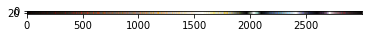

In [95]:
# 查看所有顏色排序結果
color_strip = cv2.imread("all_color.png")
plt.imshow(color_strip)
plt.show()

# 繪製色彩條紋-HSV sorting

In [55]:
# 先把HSV的H排序好再依序讀取其RGB
sort_all_color = pd.read_csv("sort_all_color.csv")

In [ ]:
# 繪製直條色塊的function
def generatePics (c_sorted):
    # Generates the picture
    height = 100;
    num_color = len(c_sorted);
    img = np.zeros((height,num_color,3), np.uint8) # (0,255)

    for x in range(0, num_color-1):
        c = [c_sorted[x][2] * 255, c_sorted[x][1] * 255, c_sorted[x][0] * 255]
        img[:,x] = c

    cv2.imwrite("_color.png", img)

In [59]:
# 把所有顏色的RGB變成list
all_color_list = []
for i in range(3000):
    all_color_list.append (tuple(sort_all_color.iloc[i,9:12]))
generatePics(all_color_list)

In [69]:
# 根據電影類別
# 把所有顏色的RGB變成list
a_color_list = []
for i in range(3000):
    if sort_all_color.iloc[i,20]==1: #a12, b13, c14, d15, e16, f17, g18, h19, i20
        a_color_list.append (tuple(sort_all_color.iloc[i,9:12]))
    else:
        continue
generatePics(a_color_list)

In [77]:
# 根據colorname
# 把所有顏色的RGB變成list
color_name_list = []
for i in range(3000):
    if sort_all_color.iloc[i,21]=="green": #a12, b13, c14, d15, e16, f17, g18, h19, i20
        color_name_list.append (tuple(sort_all_color.iloc[i,9:12]))
    else:
        continue
generatePics(color_name_list)

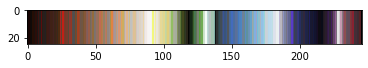

In [59]:
# 查看所有顏色排序結果
color_strip = cv2.imread("_color.png")
plt.imshow(color_strip)
plt.show()

In [ ]:
######################################################

In [1245]:
# cluster=4 的色彩
plt.figure(figsize=(300,190))
for i in range(2353,2907):
    plt.subplot(19, 30, i+1-2353)
    plt.imshow([[tuple(all_color_sort.iloc[i][9:12])]])
    plt.axis("off")
plt.savefig("cluster_4.jpg",dpi=72)
plt.show()

In [2]:
#os.chdir("IMDB-project")
os.getcwd()

'/Users/liuchenli/Desktop/NCCU/2022-workshop/IMDB-project'

In [27]:
df = pd.read_csv("IMDBdataset_withcolortag.csv")
df

,series_title,released_year,runtime,certificate,a,b,c,d,e,f,...,white,red,orange,yellow,green,blue,purple,colorname1,colorname2,colorname3
0,The Shawshank Redemption,1994,142,12,0,0,1,0,0,0,...,0,1,1,0,0,0,0,black,orange,red
1,The Godfather,1972,175,12,0,0,1,0,0,1,...,0,0,2,0,0,0,0,black,orange,orange
2,The Dark Knight,1957,96,6,0,1,1,0,0,1,...,0,0,0,0,0,1,0,blue,black,black
3,The Godfather: Part II,1974,202,12,0,0,1,0,0,1,...,0,0,2,0,0,0,0,black,orange,orange
4,12 Angry Men,2008,152,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,white,black,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,2019,126,12,1,0,1,0,0,0,...,1,1,1,0,0,0,0,white,red,orange
996,Giant,2019,137,0,0,0,1,1,0,0,...,1,1,1,0,0,0,0,orange,red,white
997,From Here to Eternity,2019,161,0,1,0,1,1,0,0,...,1,0,2,0,0,0,0,white,orange,orange
998,Lifeboat,2019,97,6,0,0,1,1,0,0,...,1,0,0,0,0,0,0,white,black,black
